<a href="https://colab.research.google.com/github/mjvakili/MLcourse/blob/master/day5/Gaussian_mixture_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gaussian mixture model

Let’s imagine a random variable $x \in R^{D}$ ($x$ lives in a $D$-dimensional Eucleadian space.) $x$ is said to be drawn from a mixture of Gaussians if:

$p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x|\mu_k, \Sigma_k)$,

Where $\mu_k$ is a $D$-dimensional vector, $\Sigma_k$ is a $D\times D$ matrix, $\pi_k$ is a positive scalar such that $\sum_{k=1}^{K} \pi_{k} = 1$ and $k = 1,...,K$.  

Intuitively speaking, one can think of such model K clusters, each following a Gaussian distribution. The mixture coefficients $\{\pi_k\}_{k=1}^{K}$ are the cluster prior probabilities, and hence they sum to unity. The probability that a given data point $\tilde{x}$ belongs to a cluster cluster $\tilde{k}$ is: 

$p(\mathrm{cluster} = \tilde{k}| x)$
 $= \frac{\pi_\tilde{k} \mathcal{N}(x|\mu_\tilde{k}, \Sigma_\tilde{k})}{\sum_{k=1}^{K} \pi_k \mathcal{N}(x|\mu_k, \Sigma_k)}$


So unlike the K-means algorithms, there is no hard assignment of clusters to the data-points and the cluster assignment is probabilistic.
This is shown in the following example:

Let’s consider an iid dataset : $\{x_n\}_{n=1}^{N}$:

$p(\{x_n\}_{n=1}^{N} | ...) = \prod_{n=1}^{N} p(x_n | ….)$

Therefore, 

$p(\{x_n\}_{n=1}^{N} | ...) = \prod_{n=1}^{N} \sum_{k=1}^{K} \pi_k \mathcal{N}(x_n|\mu_k, \Sigma_k)$

Note that finding the maximum likelihood solution for such a problem is not possible. If any of the Gaussian clusters collapses on a data-point $x_{m}$ (that is $\mu_{k}$ = $x_{m}$ and $\Sigma_{k} = 0_{D\times D}$) then the above probability becomes infinity. 

In practice, 
The parameters of the model $\{\mu_k , \Sigma_k, \pi_k\}_{k=1}^{K}$ are estimated by the Expectation-Maximization (EM) algorithm. We do not discuss the details of the algorithm in this lecture but you can learn about them in  the following references.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
#matplotlib plotting settings
import matplotlib
matplotlib.rcParams['xtick.major.size'] = 7
matplotlib.rcParams['xtick.labelsize'] = 'x-large'
matplotlib.rcParams['ytick.major.size'] = 7
matplotlib.rcParams['ytick.labelsize'] = 'x-large'
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = [7,7]

let's generate some synthetic data

Text(0, 0.5, '$X_2$')

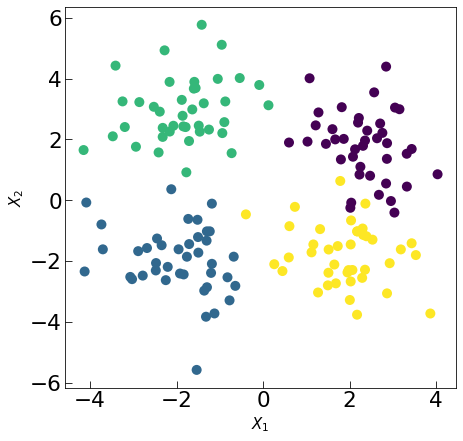

In [2]:
#Fix the random seed for reproducability
np.random.seed(1234)
#Generate a set of features
X = np.concatenate([np.random.randn(40, 2) + np.array([2, 2]), 
             np.random.randn(40, 2) + np.array([-2, -2]), 
             np.random.randn(40, 2) + np.array([-2, 3]), 
             np.random.randn(40, 2) + np.array([2, -2]),])
#Generate the labels
Y = np.concatenate([np.zeros((40)), np.zeros((40))+1, np.zeros((40))+2, np.zeros((40))+3])
#Plot the data
plt.scatter(X[:,0], X[:,1], c = Y, s = 100, edgecolor='none', alpha=1)
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")

Now we fit the data with a Gaussian mixture model:

In [0]:
gmm = GaussianMixture(n_components=4).fit(X)

Let's visualize the Gaussian components:


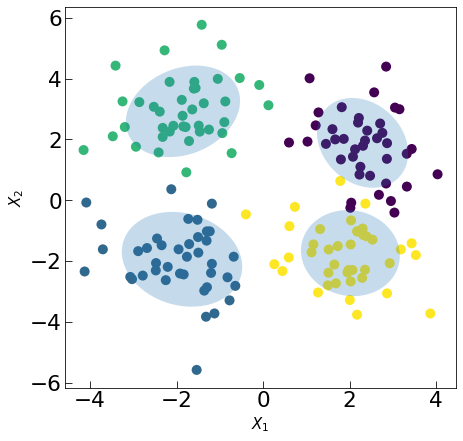

In [4]:
def draw_ellipse(X, Y, gmm):
  '''
  Plots the data and overlapping inferred Gaussian distributions.
  The gmm attributes "means_", "covariances_", "weights_" 
  are the means, covariances, and class prior probabilities inferred with the 
  EM algorithm.
  This function is written with slight modification of this 
  scikit-learn example: 
  https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html
  '''
  fig, ax = plt.subplots()
  
  for (mean, covar, weight) in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    v, w = np.linalg.eigh(covar)
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    # Plot an ellipse to show the Gaussian component
    angle = np.arctan(u[1] / u[0])
    angle = 180. * angle / np.pi  # convert to degrees
    ell = matplotlib.patches.Ellipse(mean, v[0], v[1], 180. + angle)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(weight)
    ax.add_artist(ell)
  ax.scatter(X[:,0], X[:,1], c = Y, s = 100, edgecolor='none', alpha = 1)
  ax.set_xlabel(r"$X_1$")
  ax.set_ylabel(r"$X_2$")

  return None   

draw_ellipse(X, Y, gmm)

As discussed above, the class assignment in the GMM model is probabilistic. 
The class probabilities of the examples can be computed in the following way:

In [0]:
#Class probabilities : p(class | x_i), for each example x_i, this is a Nc dimensional vector where Nc is the specified number of Gaussian mixtures 
class_probs = gmm.predict_proba(X)
#The best class estimate, the cluster with the highest class probability
class_best = gmm.predict(X)

Let's visualize the class probabilities and the best assigned classes. In what follows, the examples will be color-coded with their best estimated class. Moreover, the sizes are weighted by the probability that the examples belong to their best estimated classes.

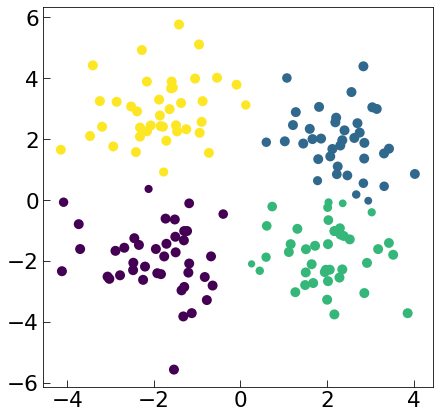

In [7]:
plt.scatter(X[:,0], X[:,1], c = class_best, edgecolor='none', s = 100 * np.max(class_probs, axis = 1))


#How many mixtures of Gaussians should I be using for my problem?

This is another instance of model complexity. Choosing a large number of clusters can yeild a higher likelihood given the training data but at the expense of using an unnecessarily complex model. One way to tackle this issue is to make use of some information criteria. The information criteria encourage higher likelihood of the data but at the same time punishes higher model complexity. 

Two common choices of IC are alkaik information criteria (AIC) 

AIC = $-2 \log \mathcal{L} + 2N_{\rm params}$,

And Bayesian information criteria (BIC)

BIC =  $-2 \log \mathcal{L} + N_{\rm params} \log N_{\rm data}$,

where $\log \mathcal{L}$ is the log-likelihood of the model given the data, $N_{\rm data}$ is the number of data, and $N_{\rm params}$ is the number of parameters.

The model that yields a lower information criteria is preferable.

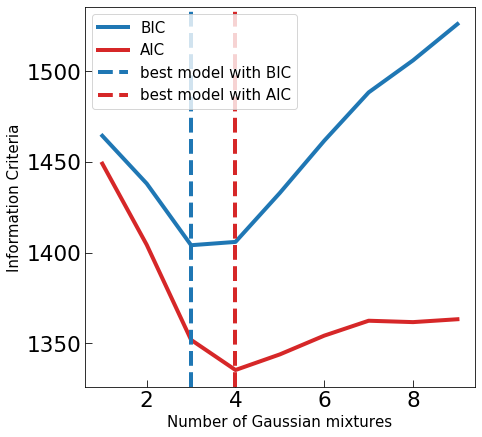

In [8]:
n_mixtures = np.arange(1, 10)
mix_models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_mixtures]

bic_placeholder = np.array([mix_model.bic(X) for mix_model in mix_models])
aic_placeholder = np.array([mix_model.aic(X) for mix_model in mix_models])

best_bic_model = n_mixtures[np.argmin(bic_placeholder)]
best_aic_model = n_mixtures[np.argmin(aic_placeholder)]

plt.plot(n_mixtures, bic_placeholder, label='BIC', color = "C0", linewidth = 4)
plt.plot(n_mixtures, aic_placeholder, label='AIC', color = "C3", linewidth = 4)
plt.axvline(best_bic_model, label= 'best model with BIC', linestyle = "dashed", color = "C0", linewidth = 4)
plt.axvline(best_aic_model, label = 'best model with AIC', linestyle = "dashed", color = "C3", linewidth = 4)
plt.xlabel('Number of Gaussian mixtures')
plt.ylabel('Information Criteria')
plt.legend(loc = 'best')